In [1]:
#cos clustering, BPR 패키지 설치
!pip install soyclustering
!pip install implicit
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.7 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import koreanize_matplotlib
from implicit.bpr import BayesianPersonalizedRanking
import plotly.express as px

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.manifold import TSNE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


#warning 메시지 무시를 위한 코드
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)

In [4]:
#all_merge_d.to_csv('final.csv', index=False)
# merge_dd_dumi.to_csv('fi_inco.csv', index=False, encoding='utf-8-sig')

final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/최종프/전처리완료파일/final.csv')
final_enco = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/최종프/전처리완료파일/fi_inco (1).csv')



In [4]:
si_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/최종프/final_업권분류.csv')

In [ ]:
display(final.head())
print(final.columns)
display(final_enco)
print(final_enco.columns)

,index,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,...,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,0,15110,2197182,C,2,25,2,7,1,4,...,0,0,0,0,0,0,0,0,0,0
1,1,56423,254040,C,2,28,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1659127,5420542,C,2,46,4,7,1,5,...,0,0,0,0,0,0,0,0,0,0
3,3,817293,5884271,C,1,41,4,6,4,7,...,0,0,0,0,0,0,0,0,0,0
4,4,798115,6197631,C,1,54,5,3,1,1,...,0,0,0,0,0,0,0,0,0,0


Index(['index', 'JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE',
       'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1',
       'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물'],
      dtype='object')


,index,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,...,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2
0,0,15110,2197182,2,2,7,1,4,5000,1,...,0,0,0,0,1,0,0,0,0,1
1,1,56423,254040,2,2,1,1,1,170,2,...,0,0,0,0,0,1,0,0,0,1
2,2,1659127,5420542,2,4,7,1,5,180,2,...,1,0,0,0,0,1,0,0,0,1
3,3,817293,5884271,1,4,6,4,7,110,1,...,0,0,1,0,1,0,0,0,1,0
4,4,798115,6197631,1,5,3,1,1,50,2,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58424,1892963,8605817,1,3,6,4,7,10,1,...,0,0,1,0,1,0,0,0,1,0
58423,58425,1898196,5285028,1,2,6,2,99,1,1,...,0,0,0,1,1,0,0,0,1,0
58424,58426,1942749,6650657,1,2,6,4,7,6,1,...,0,0,1,0,1,0,0,0,1,0
58425,58427,1946706,8536828,2,5,6,4,7,8,1,...,0,0,1,0,1,0,0,0,0,1


Index(['index', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2'],
      dtype='object')


In [ ]:
#보험 가입자 대상으로만 (보험금 청구데이터를 제외하고)보면 6000건 일때와 반대로 유의미한 결과를 볼 수 있지않을까


In [ ]:
drop = ['index', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD','CT_PY_AMT', 'CT_PY_PD', 'mean_AMT',
       'reduce_STAT_CD', 'CT_CHNL_CD','CT_PY_CYCLE_CD','총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물' ]
final_enco_anal = final_enco.drop(columns=drop, axis=1, inplace= False)

In [4]:
final.columns

Index(['index', 'JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE',
       'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1',
       'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물'],
      dtype='object')

In [5]:
drop_1 = ['index','JOIN_SN', 'POL_SN','CT_RLPS_GBN_CD','AGE','CT_PY_AMT','총지급금액', 'mean_AMT','총지급 건수', '기타', '배책','CT_PY_CYCLE_CD',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물' ,'AGE']
result = final.drop(columns=drop_1, axis=1, inplace= False)

In [11]:
scaler = MinMaxScaler()
mm = pd.DataFrame(scaler.fit_transform(final[['mean_AMT']]))
result = pd.concat([result,mm], axis =1 )
result

,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_PD,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,0
0,2,2,7,1,4,0,1,0,0,0,0.083318
1,2,2,1,1,1,5,1,0,0,0,0.002817
2,2,4,7,1,5,3,1,0,0,0,0.002983
3,1,4,6,4,7,0,1,0,0,1,0.001817
4,1,5,3,1,1,20,1,1,1,0,0.000817
...,...,...,...,...,...,...,...,...,...,...,...
58422,1,3,6,4,7,0,1,0,0,1,0.000150
58423,1,2,6,2,99,0,1,0,0,0,0.000000
58424,1,2,6,4,7,0,1,0,0,1,0.000083
58425,2,5,6,4,7,0,1,0,0,1,0.000117


In [ ]:
final_enco_anal.columns

Index(['GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4', '연령대_0', '연령대_1',
       '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6', '연령대_7', '연령대_8', '보험종류_1',
       '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8',
       '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '채널_1', '채널_2',
       '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99', '납입주기_1', '납입주기_2',
       '납입주기_3', '납입주기_99', '성별_1', '성별_2'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
mm = pd.DataFrame(scaler.fit_transform(final_enco[['CT_PY_AMT', 'CT_PY_PD', 'mean_AMT']]),
                  columns=('CT_PY_AMTmm', 'CT_PY_PDmm', 'mean_AMTmm'))
mm

,CT_PY_AMTmm,CT_PY_PDmm,mean_AMTmm
0,0.083318,0.000000,0.083318
1,0.002817,0.050505,0.002817
2,0.002983,0.030303,0.002983
3,0.001817,0.000000,0.001817
4,0.000817,0.202020,0.000817
...,...,...,...
58422,0.000150,0.000000,0.000150
58423,0.000000,0.000000,0.000000
58424,0.000083,0.000000,0.000083
58425,0.000117,0.000000,0.000117


In [ ]:
final_enco_anal = pd.concat([final_enco_anal,mm], axis =1 )
final_enco_anal

,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,...,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,CT_PY_AMTmm,CT_PY_PDmm,mean_AMTmm
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.083318,0.000000,0.083318
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0.002817,0.050505,0.002817
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0.002983,0.030303,0.002983
3,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0.001817,0.000000,0.001817
4,1,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0.000817,0.202020,0.000817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0.000150,0.000000,0.000150
58423,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0.000000,0.000000,0.000000
58424,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0.000083,0.000000,0.000083
58425,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0.000117,0.000000,0.000117


In [ ]:
from pandas.api.types import CategoricalDtype
from scipy import sparse

#더미변수로 one_hot인코딩 한 df ->벡터로 형태변환
sparse_matrix = sparse.csr_matrix(final_enco_anal)
sparse_matrix

<58427x43 sparse matrix of type '<class 'numpy.float64'>'
	with 668211 stored elements in Compressed Sparse Row format>

In [ ]:
#클러스터 개수 범주형 개수*2(80) 개로 설정
from soyclustering import SphericalKMeans

spherical_kmeans = SphericalKMeans(
    n_clusters=80,
    max_iter=30,
    verbose=1,
    init='similar_cut',
    random_state=9
)

labels = spherical_kmeans.fit_predict(sparse_matrix)

initialization_time=0.035015 sec, sparsity=0.266
n_iter=1, changed=57281, inertia=9086.786, iter_time=0.668 sec, sparsity=0.828
n_iter=2, changed=16030, inertia=6990.145, iter_time=0.631 sec, sparsity=0.757
n_iter=3, changed=6135, inertia=6370.390, iter_time=0.622 sec, sparsity=0.735
n_iter=4, changed=3258, inertia=6179.378, iter_time=0.619 sec, sparsity=0.722
n_iter=5, changed=2856, inertia=6092.390, iter_time=0.610 sec, sparsity=0.715
n_iter=6, changed=2371, inertia=5987.819, iter_time=0.620 sec, sparsity=0.708
n_iter=7, changed=1533, inertia=5932.581, iter_time=0.633 sec, sparsity=0.703
n_iter=8, changed=772, inertia=5902.533, iter_time=0.603 sec, sparsity=0.697
n_iter=9, changed=651, inertia=5892.029, iter_time=0.623 sec, sparsity=0.694
n_iter=10, changed=579, inertia=5877.271, iter_time=0.582 sec, sparsity=0.692
n_iter=11, changed=374, inertia=5862.780, iter_time=0.884 sec, sparsity=0.691
n_iter=12, changed=528, inertia=5858.046, iter_time=1.134 sec, sparsity=0.691
n_iter=13, chan

In [ ]:
from soyclustering import proportion_keywords

centers = spherical_kmeans.cluster_centers_
keywords = proportion_keywords(centers, labels)
keywords

[[(17, 0.8737100686301562),
  (8, 0.8159094149824841),
  (32, 0.778793922040568),
  (3, 0.6654314085100693),
  (38, 0.6489083954792354),
  (2, 0.5910398348033338),
  (27, 0.5855373136089571),
  (28, 0.5609577480901384),
  (33, 0.560406932442576),
  (1, 0.5250079729493001),
  (25, 0.5211013678540822),
  (0, 0.5110827689588646),
  (22, 0.504377645391541)],
 [(24, 0.966851346261559),
  (20, 0.9323681723499564),
  (21, 0.8229100403935123),
  (4, 0.7523608552530329),
  (5, 0.7091958332341856),
  (3, 0.7062946005413588),
  (23, 0.686025905069382),
  (38, 0.6761220320361332),
  (12, 0.6682103049866895),
  (6, 0.6592632070382002),
  (26, 0.589193758480698),
  (25, 0.5500824503791342),
  (35, 0.5477401390296351),
  (31, 0.5342435677839075),
  (7, 0.531454105999827),
  (9, 0.510086247069786),
  (28, 0.5097305582242315)],
 [(23, 0.8846158289028223),
  (14, 0.6806731882896304),
  (38, 0.6614098773522228),
  (4, 0.6544417827953224),
  (26, 0.6417929554180523),
  (2, 0.5827863918627185),
  (1, 0.581

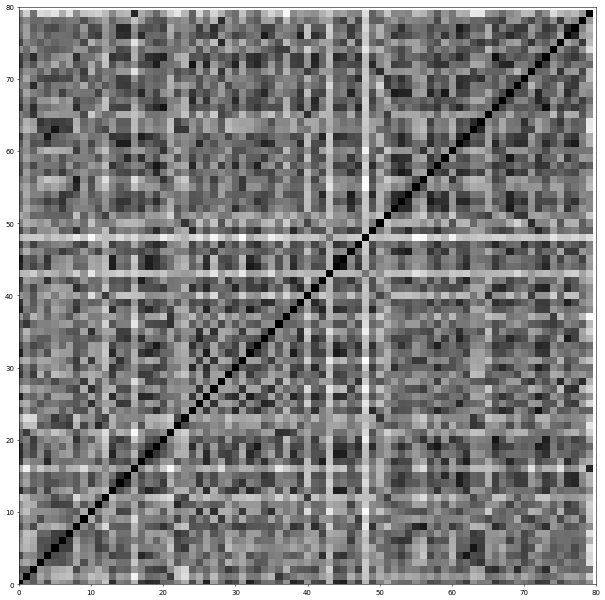

In [ ]:
from soyclustering import visualize_pairwise_distance
#유사한 군집 확인
# visualize pairwise distance matrix
fig = visualize_pairwise_distance(centers, max_dist=.7, sort=True)

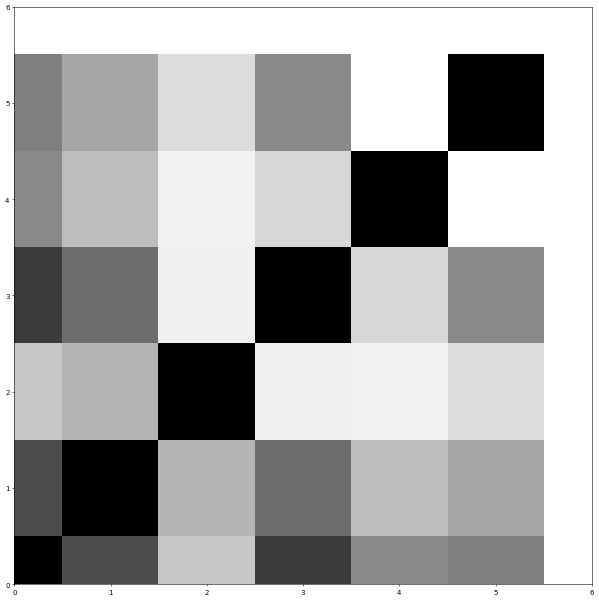

In [ ]:
from soyclustering import merge_close_clusters

#유사한 군집 병합
group_centers, groups = merge_close_clusters(centers, labels, max_dist=.45)
fig = visualize_pairwise_distance(group_centers, max_dist=.6, sort=True)

In [ ]:
#클러스터들이 이렇게 합쳐졌다를 보여주는 리스트

group_list =[]
for group in groups:
  group_list.append(group)
  print(group)

print('--------------')
print(group_list)

[70, 73, 61, 53, 66, 68, 17, 47, 56, 72, 31, 20, 62, 49, 77, 26, 14, 29, 69, 15, 54, 2, 19, 41, 8, 39, 30, 76, 57, 0, 24, 18, 33, 58, 42, 34, 13, 36, 4, 44, 38, 52, 59, 46, 45, 60, 67, 32]
[23, 50, 71, 9, 28, 3, 22, 75, 64, 63, 12, 40, 51, 65, 6, 5, 11, 7, 78]
[48, 43]
[37, 27, 10, 21, 35, 74, 25, 55]
[79, 16]
[1]
--------------
[[70, 73, 61, 53, 66, 68, 17, 47, 56, 72, 31, 20, 62, 49, 77, 26, 14, 29, 69, 15, 54, 2, 19, 41, 8, 39, 30, 76, 57, 0, 24, 18, 33, 58, 42, 34, 13, 36, 4, 44, 38, 52, 59, 46, 45, 60, 67, 32], [23, 50, 71, 9, 28, 3, 22, 75, 64, 63, 12, 40, 51, 65, 6, 5, 11, 7, 78], [48, 43], [37, 27, 10, 21, 35, 74, 25, 55], [79, 16], [1]]


In [ ]:
#cos k-means로 할당된 1차 그룹 라벨링
result['group_1'] =labels


#클러스터링 재 할당

def cluster_reduce(x):
    for i, group in enumerate(group_list):
        if x in group:
            return i

    return -1  # 그룹에 없는 값인 경우 -1 반환

result['re_group'] = result['group_1'].apply(cluster_reduce)
result

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,group_1,re_group
0,15110,2197182,C,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,23,1
1,56423,254040,C,2,2,1,1,1,170,2,5,170.0,1,0,0,0,70,0
2,1659127,5420542,C,2,4,7,1,5,180,2,3,180.0,1,0,0,0,63,1
3,817293,5884271,C,1,4,6,4,7,110,1,0,110.0,1,0,0,1,48,2
4,798115,6197631,C,1,5,3,1,1,50,2,20,50.0,1,1,1,0,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1892963,8605817,C,1,3,6,4,7,10,1,0,10.0,1,0,0,1,48,2
58423,1898196,5285028,C,1,2,6,2,99,1,1,0,1.0,1,0,0,0,43,2
58424,1942749,6650657,C,1,2,6,4,7,6,1,0,6.0,1,0,0,1,48,2
58425,1946706,8536828,C,2,5,6,4,7,8,1,0,8.0,1,0,0,1,48,2


In [ ]:
result['re_group'].value_counts()

re_group
0    39060
1    12202
3     4942
2     1403
4      601
5      219
Name: count, dtype: int64

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(result)

#업권 코드별 돌려보기

In [10]:
si_df.shape

(58427, 28)

In [9]:
si_df.columns

Index(['JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '업권'],
      dtype='object')

In [5]:
si_df_1 = si_df[si_df['업권']==1]
si_df_2 = si_df[si_df['업권']==2]
si_df_0 = si_df[si_df['업권']==0]
si_df['업권'].value_counts()

업권
1    32820
2    21747
0     3860
Name: count, dtype: int64

In [6]:
drop_col = ['JOIN_SN', 'POL_SN','CT_RLPS_GBN_CD','AGE','총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물','업권']

si_df_0d = si_df_0.drop(columns=drop_col, axis=1, inplace=False)

cosine_sim = cosine_similarity(si_df_0d)

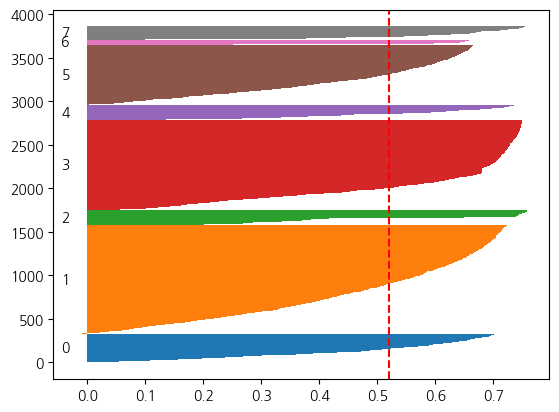

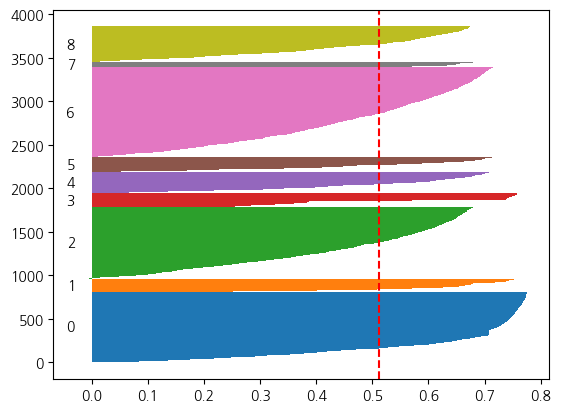

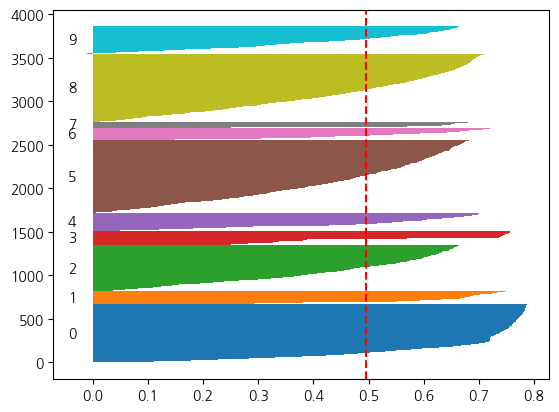

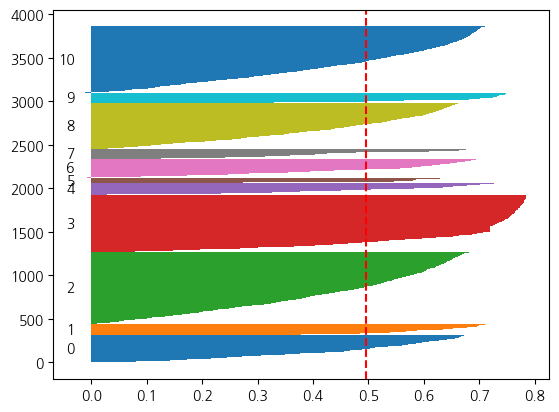

In [7]:
#업권코드 1에 대해서 silhouette_score

for k in range(8, 12):
    fig, ax = plt.subplots(1, 1)
    kmeans2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim)
    silhouette_vals = silhouette_samples(cosine_sim, kmeans2.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans2.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans2.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)

    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

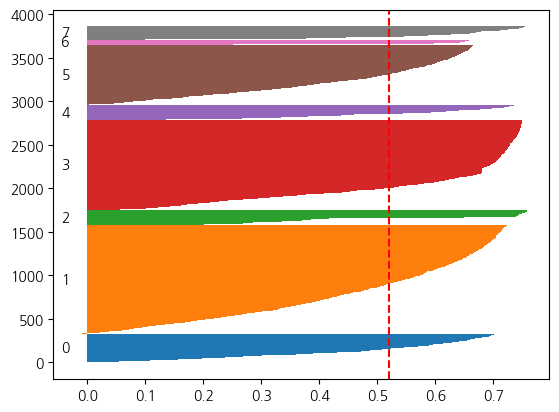

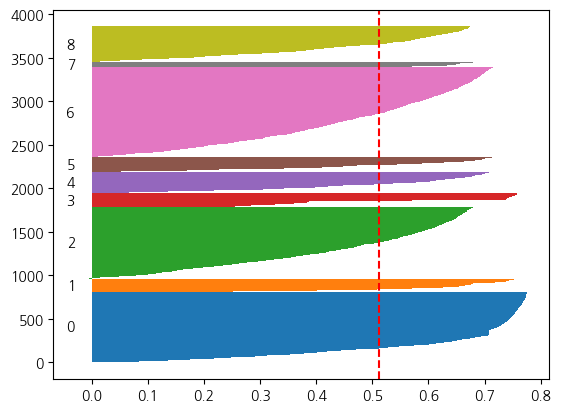

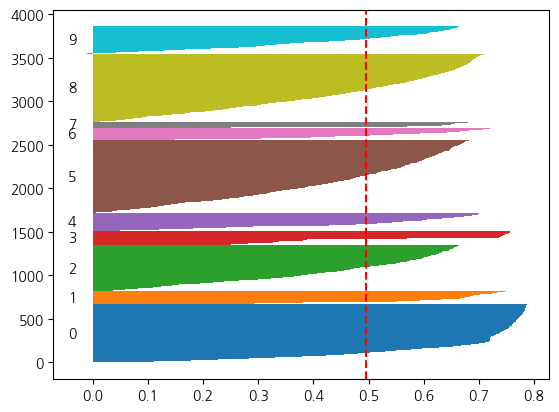

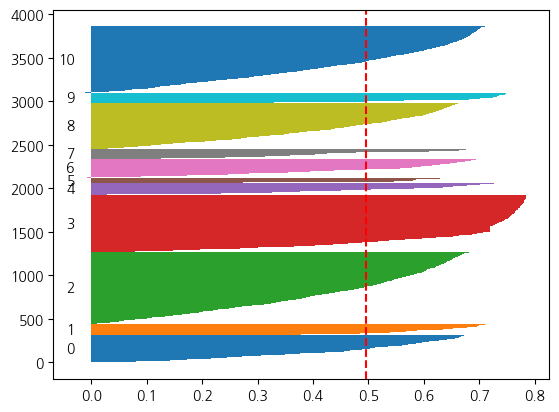

In [8]:
si_df_2d = si_df_0.drop(columns=drop_col, axis=1, inplace=False)

cosine_sim = cosine_similarity(si_df_2d)

#업권코드 2에 대해서 silhouette_score

for k in range(8, 12):
    fig, ax = plt.subplots(1, 1)
    kmeans2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim)
    silhouette_vals = silhouette_samples(cosine_sim, kmeans2.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans2.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans2.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)

    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

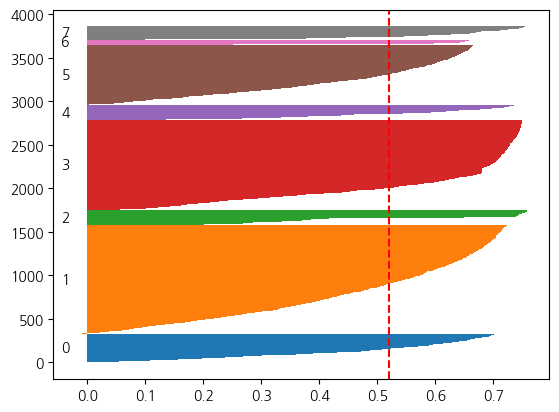

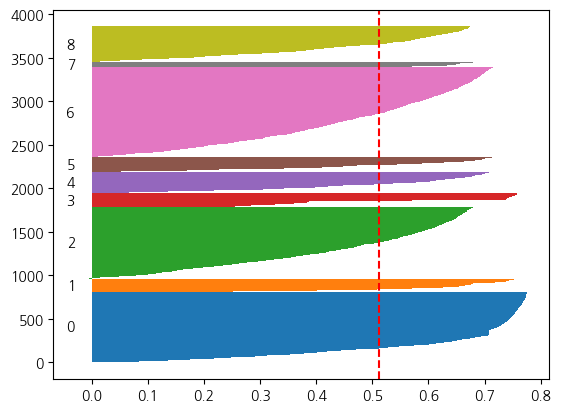

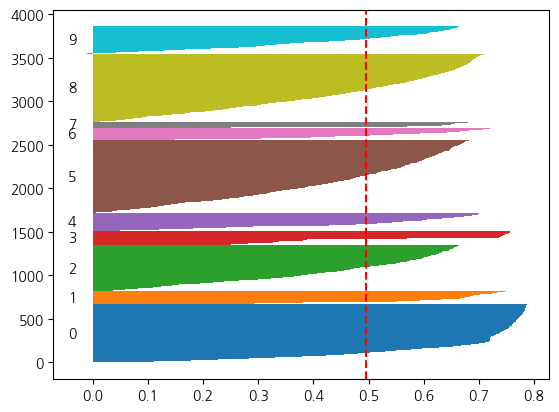

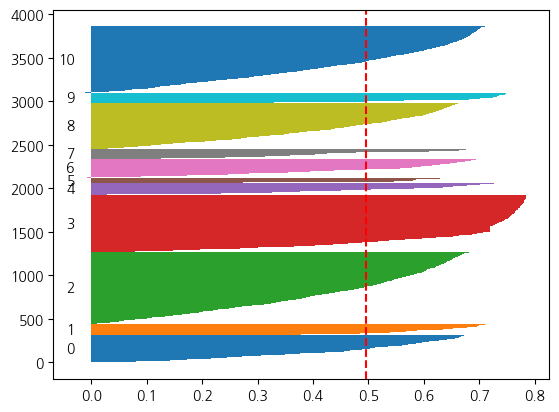

In [9]:
si_df_1d = si_df_0.drop(columns=drop_col, axis=1, inplace=False)

cosine_sim = cosine_similarity(si_df_1d)

#업권코드 1에 대해서 silhouette_score

for k in range(8, 12):
    fig, ax = plt.subplots(1, 1)
    kmeans2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim)
    silhouette_vals = silhouette_samples(cosine_sim, kmeans2.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans2.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans2.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)

    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

# 업권코드까지 모두합쳐서 돌려보기 => 터진다... 로컬도 돌리기전에 에러부터 뜬다

In [ ]:
si_df_d = si_df.drop(columns=drop_col, axis=1, inplace=False)

cosine_sim = cosine_similarity(si_df_d)

#업권코드 1에 대해서 silhouette_score

for k in range(8, 12):
    fig, ax = plt.subplots(1, 1)
    kmeans2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim)
    silhouette_vals = silhouette_samples(cosine_sim, kmeans2.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans2.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans2.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)

    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")